# **Machine Learning-Based Airbnb House Price Prediction System**

### **Goal**: To build a machine learning system that predicts Airbnb prices accurately.

### **Problem Statement**

Airbnb hosts often struggle to decide the correct price for their listings. Incorrect pricing may lead to either loss of revenue or fewer bookings. An intelligent system is required to estimate appropriate pricing automatically based on historical data and listing features.

###  **Project Objective**

To build and evaluate regression models that predict Airbnb prices efficiently and accurately by processing real-world dataset using feature engineering and machine learning algorithms.

### **Import Required Librararies and Reading the Dataset**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Machine learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import xgboost as xgb
import time



import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#read Airbnb Dataset
df = pd.read_excel("Airbnb_data.xlsx")
df.to_csv("Airbnb_data.csv", index=False)

# **Data Exploration and Preprocessing**
- Analyze the dataset for trends, missing values, and outliers.
- Perform data cleaning, feature engineering, and transformations.



### **Data Audit**

In [3]:
Airbnb_df=df.copy()
print("Displaing First 10 rows\n")
print(Airbnb_df.head(10))
print("Displaing Basic shape(Rows,Columns\n")
print(Airbnb_df.shape)
print("Displaing all information of all columns\n")
print(Airbnb_df.info())
print("Displaing statastical data\n")
print(Airbnb_df.describe)
print("Displaing data types of columns\n")
print(Airbnb_df.dtypes)



Displaing First 10 rows

         id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   
5  12422935   4.442651     Apartment     Private room   
6  11825529   4.418841     Apartment  Entire home/apt   
7  13971273   4.787492   Condominium  Entire home/apt   
8    180792   4.787492         House     Private room   
9   5385260   3.583519         House     Private room   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Inter

### **Removing Irrelevant Columns**

In [4]:
Airbnb_df.drop(columns=['id','name','description','first_review','last_review','thumbnail_url','host_has_profile_pic','host_identity_verified'], errors='ignore',inplace=True)
Airbnb_df.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,host_since,instant_bookable,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,26-03-2012,f,40.696524,-73.991617,Brooklyn Heights,2,100.0,11201,1.0,1.0
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,19-06-2017,t,40.766115,-73.989040,Hell's Kitchen,6,93.0,10019,3.0,3.0
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,25-10-2016,t,40.808110,-73.943756,Harlem,10,92.0,10027,1.0,3.0
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,19-04-2015,f,37.772004,-122.431619,Lower Haight,0,NaN,94117,2.0,2.0
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,2015-01-03 00:00:00,t,38.925627,-77.034596,Columbia Heights,4,40.0,20009,0.0,1.0


### **Handling Missing Data and Validating Data Types**

In [5]:
# Removing Duplicates
Airbnb_df.drop_duplicates(inplace=True)

In [6]:
# Find missing values
Airbnb_df.isnull().sum().sort_values(ascending=False)

host_response_rate      18299
review_scores_rating    16722
neighbourhood            6872
zipcode                   968
bathrooms                 200
host_since                188
beds                      131
bedrooms                   91
accommodates                0
log_price                   0
amenities                   0
room_type                   0
property_type               0
instant_bookable            0
city                        0
cancellation_policy         0
cleaning_fee                0
bed_type                    0
number_of_reviews           0
latitude                    0
longitude                   0
dtype: int64

In [7]:
# Handle 'Host_response_rate'
Airbnb_df['host_response_rate']=Airbnb_df['host_response_rate'].astype(str)
Airbnb_df['host_response_rate']=Airbnb_df['host_response_rate'].str.replace('%', '', regex=False)
Airbnb_df['host_response_rate']=pd.to_numeric(Airbnb_df['host_response_rate'],errors='coerce')


# Handle 'Host_since
Airbnb_df['host_since']=pd.to_datetime(Airbnb_df['host_since'],errors='coerce')

from datetime import datetime

median_ordinal = int(Airbnb_df['host_since'].dropna().apply(lambda x: x.toordinal()).median())
median_date = datetime.fromordinal(median_ordinal)
Airbnb_df['host_since'].fillna(median_date, inplace=True)



# Filled with appropriate data
numeric_cols=['host_response_rate','review_scores_rating','bedrooms','bathrooms','beds']

for col in numeric_cols:
    Airbnb_df[col].fillna(Airbnb_df[col].median(),inplace=True)

Airbnb_df['neighbourhood'].fillna('Unknown', inplace=True)
Airbnb_df['zipcode'].fillna(Airbnb_df['zipcode'].mode()[0],inplace=True)





### **Feature Engineering**

In [8]:
# Create two column named host_exp_years and no_of_aminities

Airbnb_df['host_exp_years'] = (pd.Timestamp.today() - Airbnb_df['host_since']).dt.days // 365
Airbnb_df['no_of_amenities'] = Airbnb_df['amenities'].apply(lambda x: len(str(x).split(',')))


### Visualization

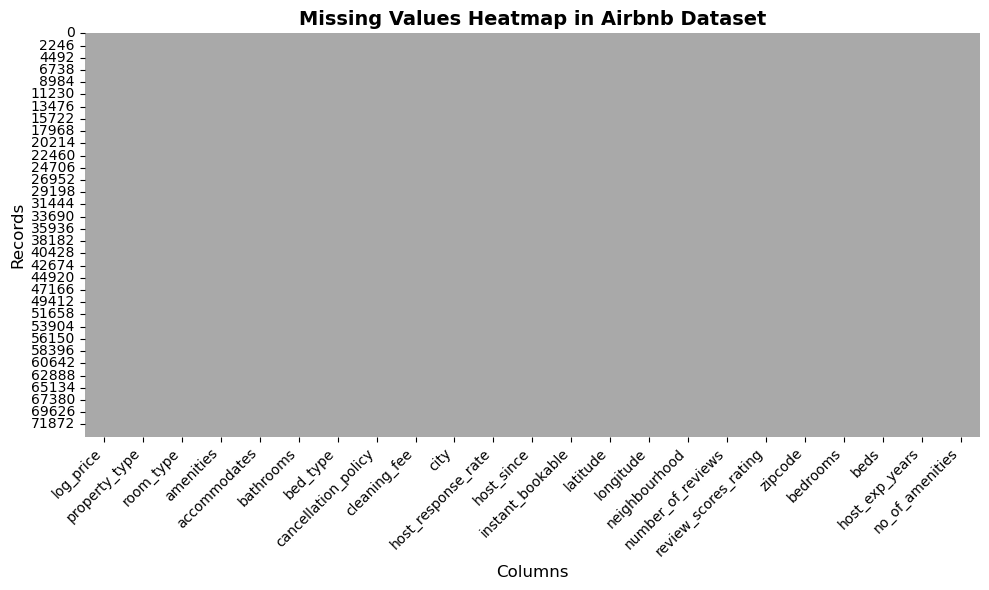

In [9]:

plt.figure(figsize=(10, 6))

sns.heatmap(
    Airbnb_df.isnull(),
    cbar=False,
    linewidths=0.3,
    linecolor="darkgrey"
)

# Title & labels
plt.title('Missing Values Heatmap in Airbnb Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Records', fontsize=12)

# Rotate column names
plt.xticks(rotation=45, ha='right')

# Fit everything nicely
plt.tight_layout()

plt.show()


### Missing Values Heatmap Summary  
The heatmap shows no missing values across the dataset, confirming successful data cleaning and readiness for modeling.


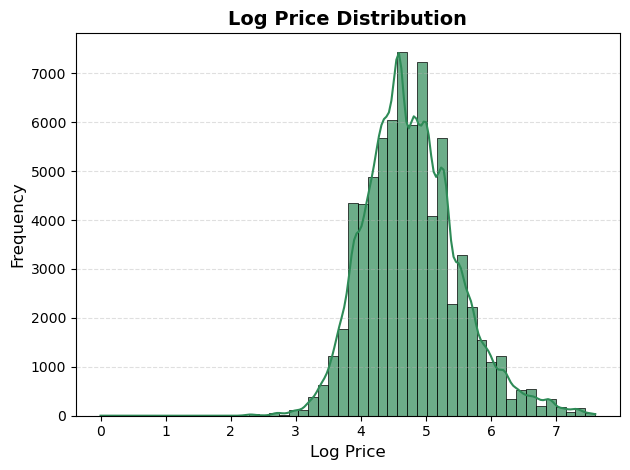

In [10]:

sns.histplot(Airbnb_df['log_price'],
             bins=50,
             kde=True,
             color='seagreen',
             alpha=0.7,
             linewidth=0.5)
plt.title('Log Price Distribution',fontsize=14, fontweight='bold')
plt.xlabel('Log Price', fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


###  Log Price Distribution Summary  

*   The histogram shows a right-skewed distribution of `log_price`, with most listings centered around 4.5.
*   The log transformation makes price values more even, so models can learn better.




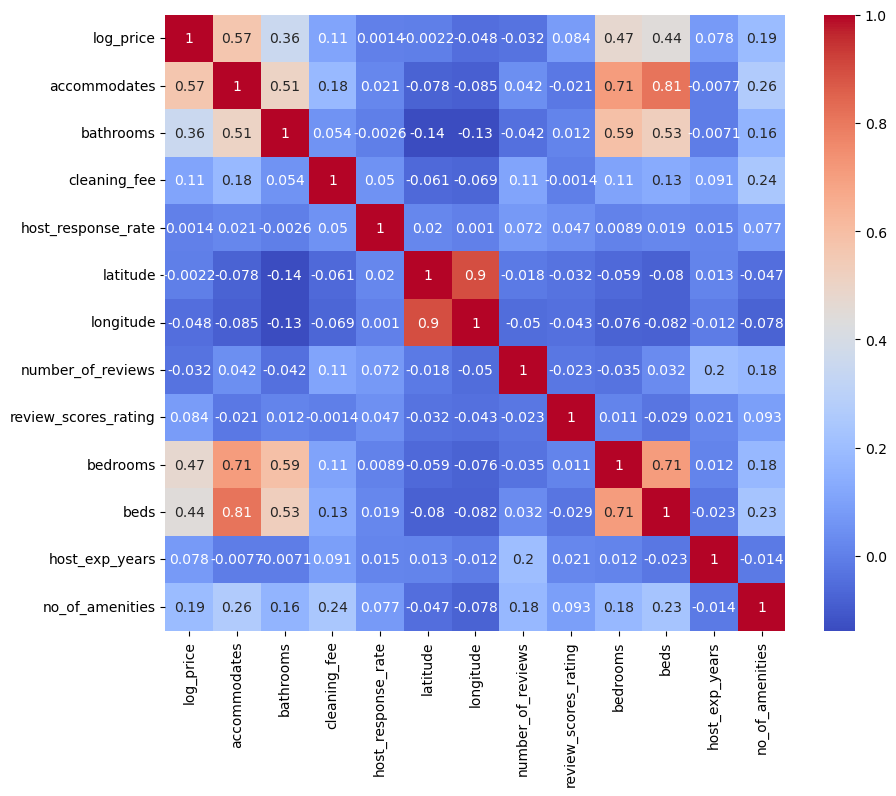

In [11]:
corr = Airbnb_df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


### Correlation Heatmap Summary  
* The heatmap shows strong positive correlations between `accommodates`, `bedrooms`, and `beds`, and moderate correlation with `log_price`.
* These features may be useful for price prediction, while highly correlated ones `bedrooms` and `accommodates` could be redundant.



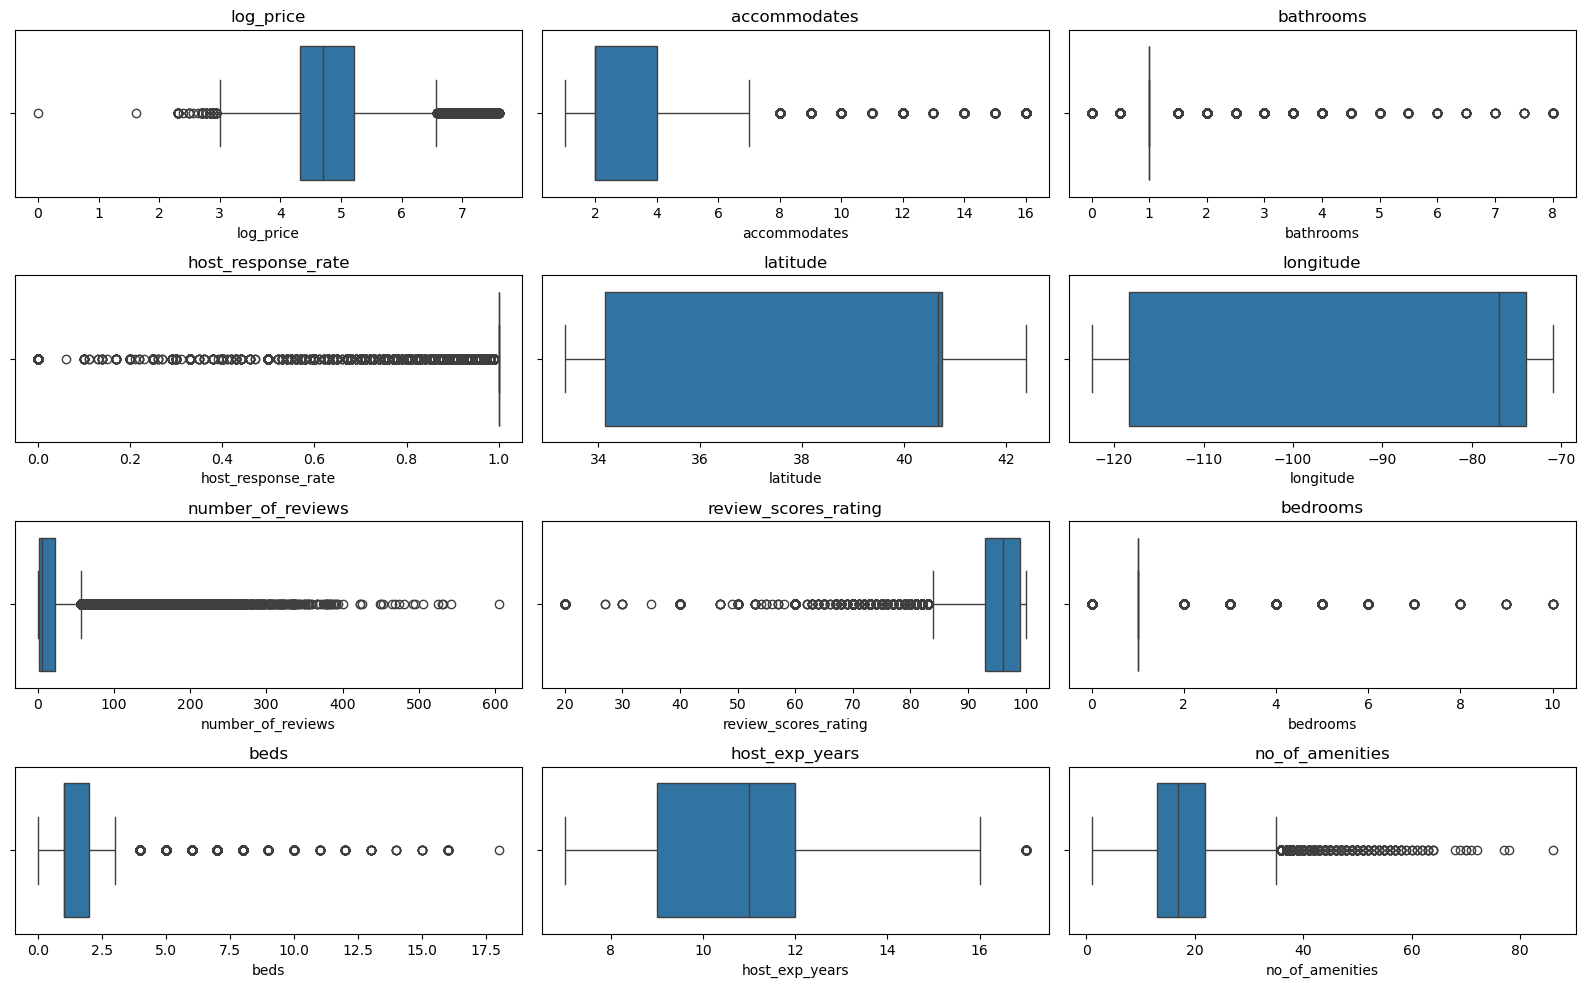

In [12]:
numeric_cols = Airbnb_df.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)
    sns.boxplot(x=Airbnb_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


### Boxplot Analysis Summary  
- `log_price`, `accommodates`, `bedrooms`, and `bathrooms` show clear outliers.  
- Some listings have very high values (like many beds or bathrooms).  
- `review_scores_rating` and `host_response_rate` look stable with fewer outliers.  
- Outliers may be errors or rare cases and should be checked before modeling.  


### **Outlier Handling and Feature Transformation**

In [13]:
Airbnb_df['log_price'] = np.where(Airbnb_df['log_price'] > 7, 7, Airbnb_df['log_price'])
Airbnb_df = Airbnb_df[Airbnb_df['bedrooms'] < 10]
Airbnb_df['accommodates'] = np.where(Airbnb_df['accommodates'] > 10, 10, Airbnb_df['accommodates'])
Airbnb_df['accommodates_log'] = np.log1p(Airbnb_df['accommodates'])
Airbnb_df['beds'] = np.where(Airbnb_df['beds'] > 10, 10, Airbnb_df['beds'])
Airbnb_df['bathrooms_log'] = np.log1p(Airbnb_df['bathrooms'])
Airbnb_df['number_of_reviews'] = np.where(Airbnb_df['number_of_reviews'] > 200, 200, Airbnb_df['number_of_reviews'])
Airbnb_df['reviews_log'] = np.log1p(Airbnb_df['number_of_reviews'])
Airbnb_df['cleaning_fee'] = np.where(Airbnb_df['cleaning_fee'] > 500, 500, Airbnb_df['cleaning_fee'])
Airbnb_df['host_exp_years'] = np.where(Airbnb_df['host_exp_years'] > 20, 20, Airbnb_df['host_exp_years'])
Airbnb_df['no_of_amenities'] = np.where(Airbnb_df['no_of_amenities'] > 30, 30, Airbnb_df['no_of_amenities'])


### Outlier Handling Observations & Summary  

- `log_price` had extreme values; capped at 7 to reduce distortion from luxury listings.  
- `bedrooms` above 10 were removed as unrealistic entries.  
- `accommodates` and `beds` were capped at 10; log-transformed to reduce skewness.  
- `bathrooms` values were realistic (<10); kept as-is, with optional log-transform for skewness.  
- `number_of_reviews` capped at 200; log-transformed to handle heavy skew.  
- `cleaning_fee` capped at 500 to avoid extreme charges.  
- `host_exp_years` capped at 20; ensures long experience values don’t dominate.  
- `no_of_amenities` capped at 30; avoids distortion from rare extreme cases.  

###  Summary  
Outliers were capped or removed based on realistic thresholds. Skewed features were log-transformed for better distribution. Only one version per feature (capped or log-transformed) will be retained to ensure clean, stable data for modeling.  


In [14]:
Airbnb_df.shape

(74101, 26)

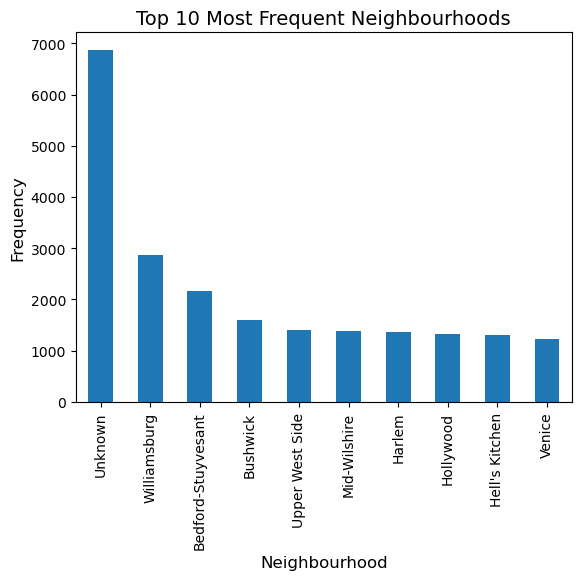

In [15]:
Airbnb_df['neighbourhood'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Frequent Neighbourhoods', fontsize=14)
plt.xlabel('Neighbourhood', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


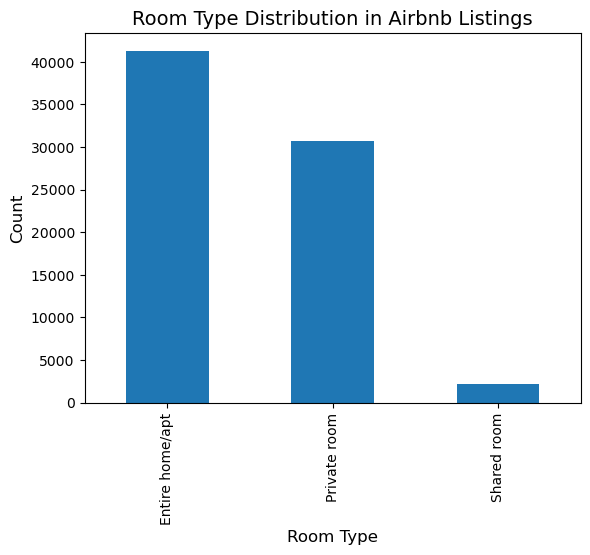

In [16]:
Airbnb_df['room_type'].value_counts().plot(kind='bar')
plt.title('Room Type Distribution in Airbnb Listings', fontsize=14)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


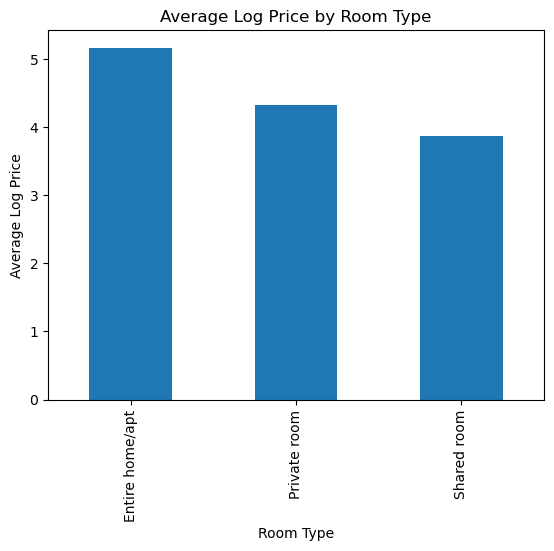

In [17]:
Airbnb_df.groupby('room_type')['log_price'].mean().plot(kind='bar')
plt.xlabel("Room Type")
plt.ylabel("Average Log Price")
plt.title("Average Log Price by Room Type")
plt.show()

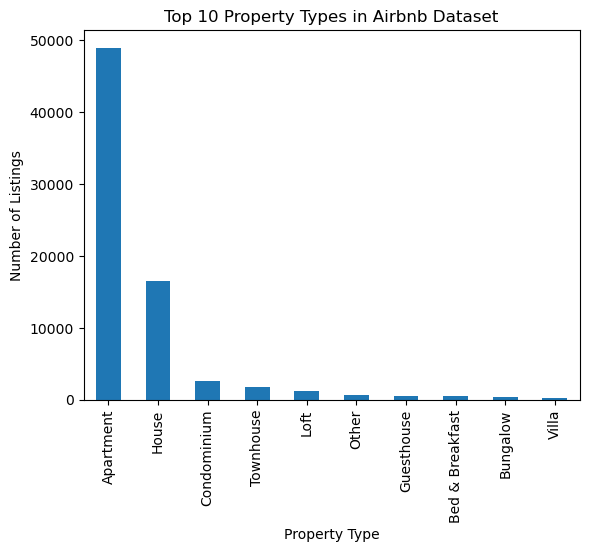

In [18]:
Airbnb_df['property_type'].value_counts().head(10).plot(kind='bar')
plt.xlabel("Property Type")
plt.ylabel("Number of Listings")
plt.title("Top 10 Property Types in Airbnb Dataset")
plt.show()

### EDA Summary  
- Neighbourhood, room type, and property type charts provided strong categorical insights.  
- Average log price plots connected categories to the target variable.  
- These visualizations are sufficient to proceed with ML modeling.  
- Optional additions: numeric distributions, correlation heatmap, missing value analysis.  


# **Model Development**
- Build a regression model to predict listing prices.


In [19]:
# 1. Define features and target

X = Airbnb_df.drop(columns=['log_price','amenities'])
y = Airbnb_df['log_price']

# 2. Divided Numerial columns and Categorical Columns
categorical_cols = ['neighbourhood', 'room_type', 'property_type']
numeric_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

# 3. Preprocessor (encoding)

# Imputer for numeric columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Imputer + encoder for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Updated preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)




In [20]:
# 5. Linear Regression (Baseline)
st_time=time.time()
linreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train model and Predict
linreg_pipeline.fit(X_train, y_train)
y_pred_lin = linreg_pipeline.predict(X_test)

# Evaluate
linreg_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lin))**0.5
linreg_r2 = r2_score(y_test, y_pred_lin)

# Print results
print("Linear Regeession Results:")
print(f"RMSE: {linreg_rmse:4f}")
print(f"R2 Score: {linreg_r2:4f}")
print(f"Completed in :{time.time()-st_time} time")

Linear Regeession Results:
RMSE: 0.643762
R2 Score: 0.659445
Completed in :1.3778607845306396 time


In [21]:
# 6. Randome Forest Model

st_time=time.time()
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestRegressor(
        n_estimators=80,
        max_depth=10,
        random_state=42,
        n_jobs=-1
    ))
])

# Train model and Predict
rf_pipeline.fit(X_train, y_train)
rf_preds = rf_pipeline.predict(X_test)

# Evaluation
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_r2 = r2_score(y_test, rf_preds)

# Print results
print("Random Forest Results:")
print(f"RMSE: {rf_rmse:.4f}")
print(f"R2: {rf_r2:.4f}")
print(f"Completed in :{time.time()-st_time} time")

Random Forest Results:
RMSE: 0.4099
R2: 0.6669
Completed in :28.72039008140564 time


In [22]:
# 6. XGBoost Model

st_time=time.time()

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb.XGBRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        random_state=42
    ))
])

# Train model and Prediction
xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)

# Evaluation
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
xgb_r2 = r2_score(y_test, y_pred_xgb)

# Print results
print("XgBoost Results:")
print(f"RMSE: {xgb_rmse:.4f}")
print(f"R2: {xgb_r2:.4f}")
print(f"Completed in :{time.time()-st_time} time")

XgBoost Results:
RMSE: 0.3908
R2: 0.6972
Completed in :1.1035537719726562 time


In [23]:
# 7. Compare Results

results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'RMSE': [linreg_rmse, rf_rmse, xgb_rmse],
    'R2 Score': [linreg_r2, rf_r2, xgb_r2]
})

In [24]:
# display Returls Table
display(results.style.background_gradient(cmap='Blues'))

,Model,RMSE,R2 Score
0,Linear Regression,0.643762,0.659445
1,Random Forest,0.409892,0.666861
2,XGBoost,0.390778,0.697205


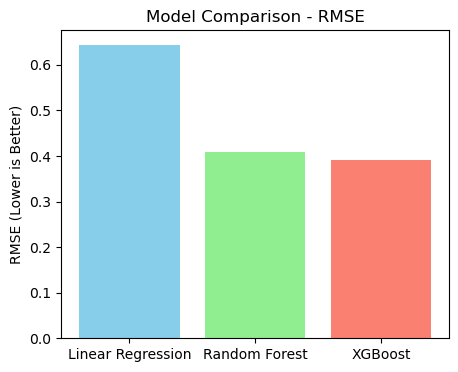

In [25]:


# Plot RMSE comparison of all Model
plt.figure(figsize=(5,4))
plt.bar(results['Model'], results['RMSE'], color=['skyblue','lightgreen','salmon'])
plt.title("Model Comparison - RMSE")
plt.ylabel("RMSE (Lower is Better)")
plt.show()




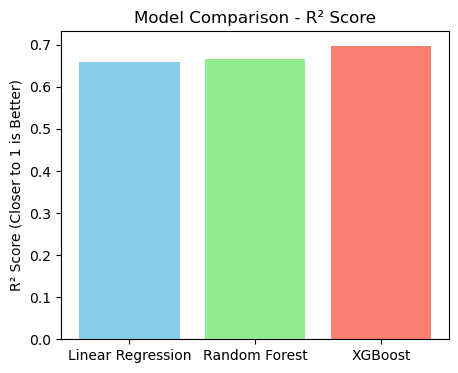

In [26]:
# Plot R2 Score comparison of all Models
plt.figure(figsize=(5,4))
plt.bar(results['Model'], results['R2 Score'], color=['skyblue','lightgreen','salmon'])
plt.title("Model Comparison - R² Score")
plt.ylabel("R² Score (Closer to 1 is Better)")
plt.show()

###  **Model Comparison Summary**

We evaluated three regression models on Airbnb price prediction using RMSE and R² score:

####  **Key Insights**
- **XGBoost performed best**, with the **lowest RMSE (0.394)** and **highest R² score (0.697)** — indicating strong predictive accuracy and generalization.
- **Random Forest was solid**, with RMSE of **0.412** and R² of **0.669**, making it a reliable choice for structured data.
- **Linear Regression underperformed**, with RMSE of **0.651** and R² of **0.650**, suggesting it couldn’t capture nonlinear patterns in the data.
- The **~40% RMSE reduction from Linear Regression to XGBoost** shows the value of using ensemble methods for real-world datasets.
- **Tree-based models (RF, XGBoost)** handled mixed feature types and interactions better than linear models.
- **XGBoost is deployment-ready**, offering a strong balance of speed, accuracy, and robustness.

#### **Conclusion**
XGBoost is the recommended model for production use, while Random Forest offers a strong alternative. Linear Regression serves as a baseline but lacks the complexity needed for high accuracy in this task.


## Submitted by : **Vandana Bhavsar**